<a href="https://colab.research.google.com/github/sanjeevtrivedi/pgd-dsai/blob/main/airline_passenger_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

d1 = pd.read_csv('./airline_passengers.csv')
print(d1.head())


     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


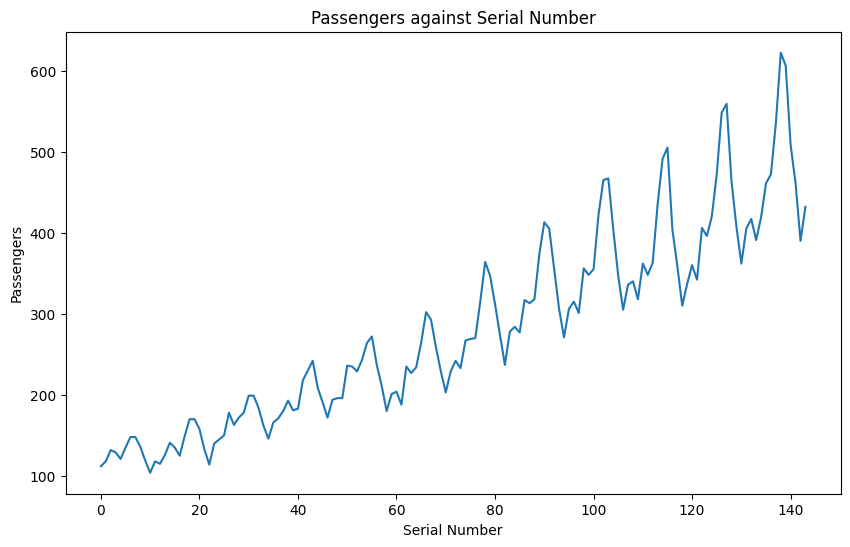

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(d1.index, d1['Passengers'])
# plt.plot(d1['Month'][:12], d1['Passengers'][:12])
plt.xlabel("Serial Number")
plt.ylabel("Passengers")
plt.title("Passengers against Serial Number")
plt.show()


# x |-> y  :::: y = f_lin(x^2)
#

                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     828.2
Date:                Sat, 05 Apr 2025   Prob (F-statistic):           4.02e-61
Time:                        12:19:16   Log-Likelihood:                -754.82
No. Observations:                 144   AIC:                             1514.
Df Residuals:                     142   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.3100      7.636     11.826      0.0

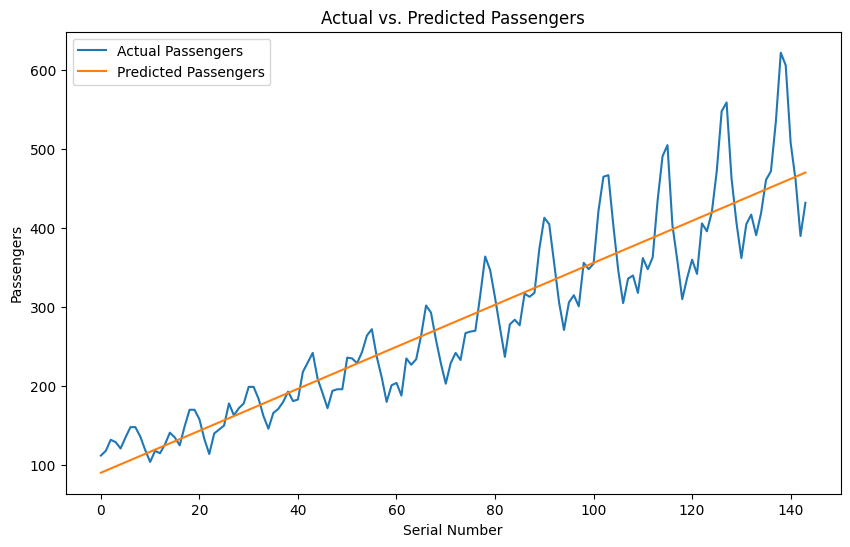

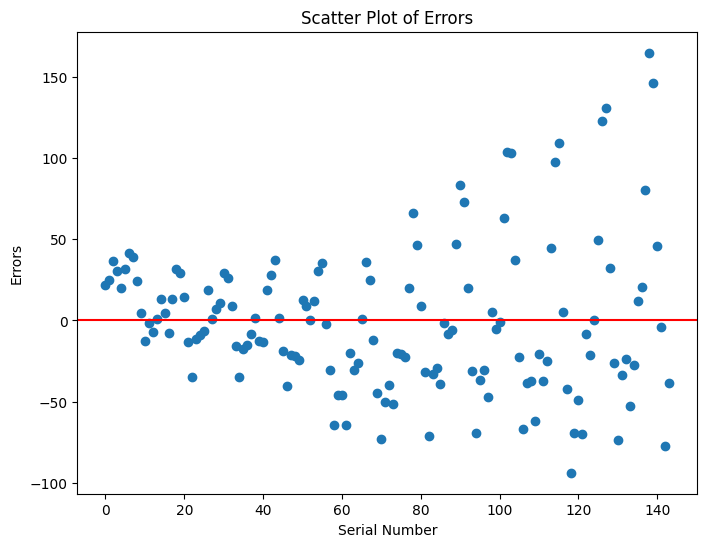

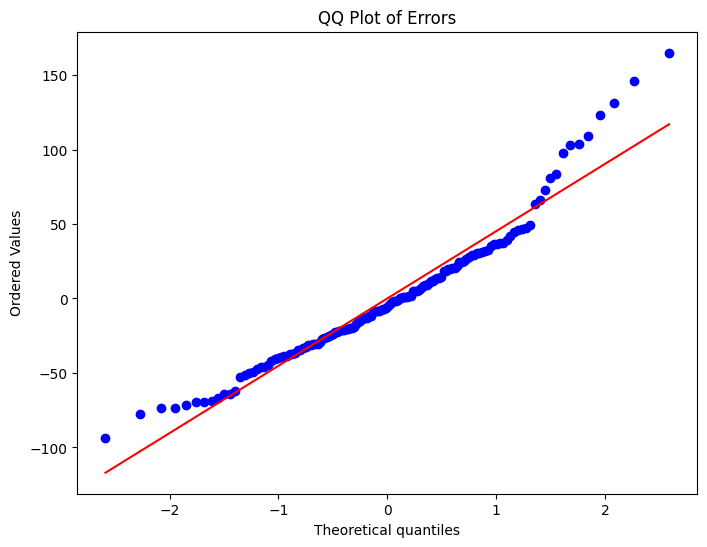

R-squared: 0.853638165603188
Mean Absolute Error (MAE): 34.405547573435484
Root Mean Squared Error (RMSE): 45.73619391613881


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats

# Drop rows with missing values
d1.dropna(inplace=True)

# Create OLS model
X = d1.index  # Serial number as independent variable
y = d1['Passengers']
X = sm.add_constant(X)  # Add a constant term to the independent variable
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

# Make predictions
predictions = model.predict(X)

# Plot predicted values against actual values
plt.figure(figsize=(10, 6))
plt.plot(d1.index, d1['Passengers'], label='Actual Passengers')
plt.plot(d1.index, predictions, label='Predicted Passengers')
plt.xlabel("Serial Number")
plt.ylabel("Passengers")
plt.title("Actual vs. Predicted Passengers")
plt.legend()
plt.show()

# Calculate errors
errors = y - predictions

# Scatter plot of errors
plt.figure(figsize=(8, 6))
plt.scatter(d1.index, errors)
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel("Serial Number")
plt.ylabel("Errors")
plt.title("Scatter Plot of Errors")
plt.show()


# QQ plot of errors
plt.figure(figsize=(8, 6))
stats.probplot(errors, dist="norm", plot=plt)
plt.title("QQ Plot of Errors")
plt.show()

# Calculate R-squared, MAE, and RMSE
r_squared = model.rsquared
mae = np.mean(np.abs(errors))
rmse = np.sqrt(np.mean(errors**2))


print(f"R-squared: {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


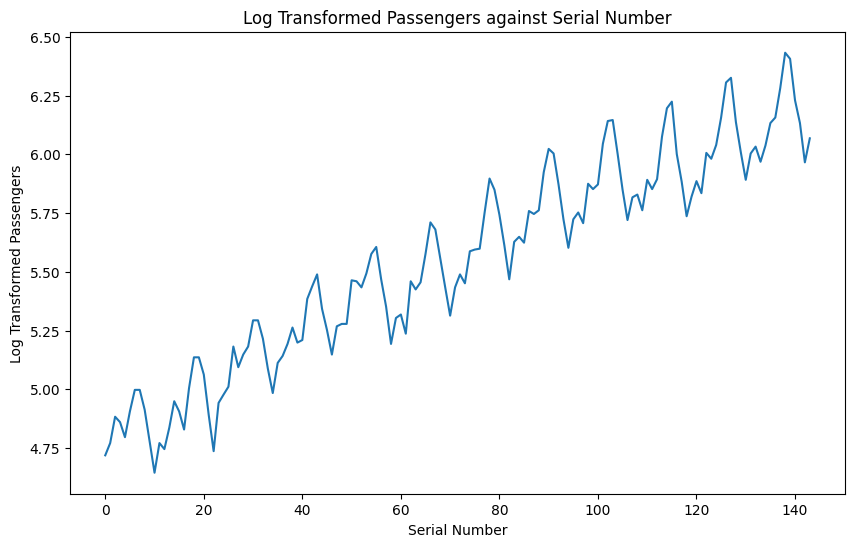

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming d1 is already loaded as in the previous code
d1['d1_logt'] = np.log(d1['Passengers'])

plt.figure(figsize=(10,6))
plt.plot(d1.index, d1['d1_logt'])
plt.xlabel("Serial Number")
plt.ylabel("Log Transformed Passengers")
plt.title("Log Transformed Passengers against Serial Number")
plt.show()


                            OLS Regression Results                            
Dep. Variable:                d1_logt   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     1300.
Date:                Sat, 05 Apr 2025   Prob (F-statistic):           2.41e-73
Time:                        12:14:15   Log-Likelihood:                 80.794
No. Observations:                 144   AIC:                            -157.6
Df Residuals:                     142   BIC:                            -151.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8237      0.023    209.248      0.0

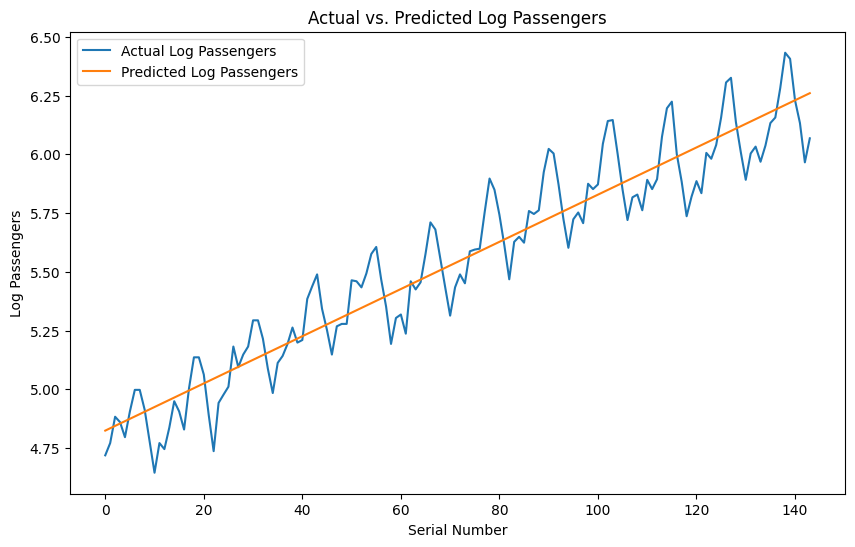

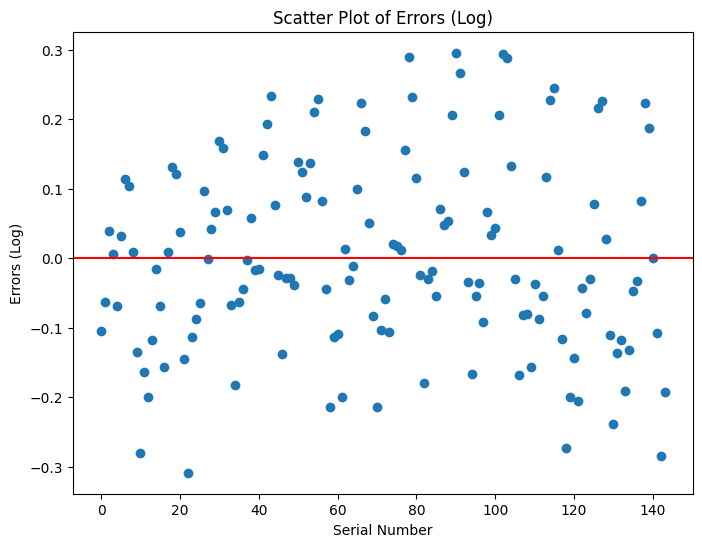

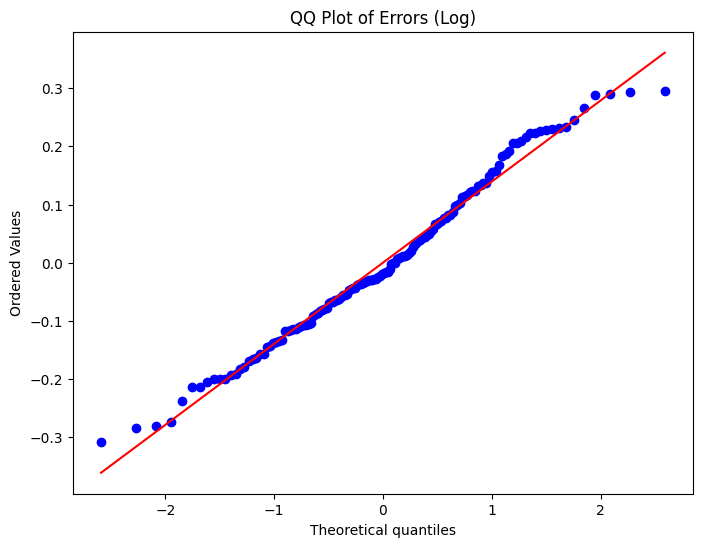

R-squared (Log): 0.9015001790437609
Mean Absolute Error (MAE) (Log): 0.11240817340012825
Root Mean Squared Error (RMSE) (Log): 0.13806777763527822


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create OLS model with log-transformed data
X_log = d1.index  # Serial number as independent variable
y_log = d1['d1_logt']
X_log = sm.add_constant(X_log)  # Add a constant term to the independent variable
model_log = sm.OLS(y_log, X_log).fit()

# Print model summary for log-transformed data
print(model_log.summary())

# Make predictions for log-transformed data
predictions_log = model_log.predict(X_log)

# Plot predicted values against actual values (log-transformed)
plt.figure(figsize=(10, 6))
plt.plot(d1.index, d1['d1_logt'], label='Actual Log Passengers')
plt.plot(d1.index, predictions_log, label='Predicted Log Passengers')
plt.xlabel("Serial Number")
plt.ylabel("Log Passengers")
plt.title("Actual vs. Predicted Log Passengers")
plt.legend()
plt.show()

# Calculate errors for log-transformed data
errors_log = y_log - predictions_log

# Scatter plot of errors (log-transformed)
plt.figure(figsize=(8, 6))
plt.scatter(d1.index, errors_log)
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel("Serial Number")
plt.ylabel("Errors (Log)")
plt.title("Scatter Plot of Errors (Log)")
plt.show()

# QQ plot of errors (log-transformed)
plt.figure(figsize=(8, 6))
stats.probplot(errors_log, dist="norm", plot=plt)
plt.title("QQ Plot of Errors (Log)")
plt.show()

# Calculate R-squared, MAE, and RMSE for log-transformed data
r_squared_log = model_log.rsquared
mae_log = np.mean(np.abs(errors_log))
rmse_log = np.sqrt(np.mean(errors_log**2))

print(f"R-squared (Log): {r_squared_log}")
print(f"Mean Absolute Error (MAE) (Log): {mae_log}")
print(f"Root Mean Squared Error (RMSE) (Log): {rmse_log}")


In [ ]:
import numpy as np
# Reverse transform the predictions
predictions_original_scale = np.exp(predictions_log)

# Calculate errors on the original scale
errors_original_scale = y - predictions_original_scale

# Calculate R-squared, MAE, and RMSE on the original scale
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_original_scale = r2_score(y, predictions_original_scale)
mae_original_scale = mean_absolute_error(y, predictions_original_scale)
rmse_original_scale = np.sqrt(mean_squared_error(y, predictions_original_scale))


print(f"R-squared (Original Scale): {r2_original_scale}")
print(f"Mean Absolute Error (MAE) (Original Scale): {mae_original_scale}")
print(f"Root Mean Squared Error (RMSE) (Original Scale): {rmse_original_scale}")


R-squared (Original Scale): 0.8534869465966298
Mean Absolute Error (MAE) (Original Scale): 33.31444506771527
Root Mean Squared Error (RMSE) (Original Scale): 45.759814815442425


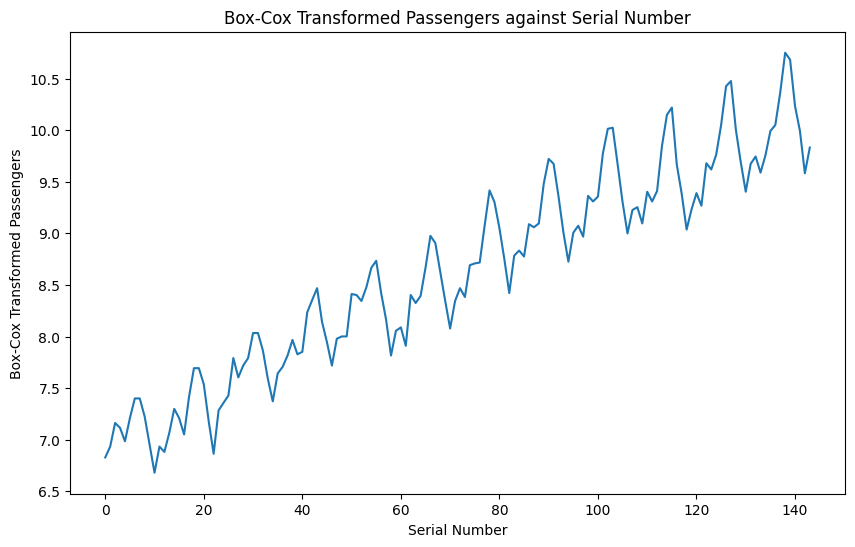

                            OLS Regression Results                            
Dep. Variable:              d1_boxcox   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1288.
Date:                Sat, 05 Apr 2025   Prob (F-statistic):           4.33e-73
Time:                        12:15:12   Log-Likelihood:                -37.652
No. Observations:                 144   AIC:                             79.30
Df Residuals:                     142   BIC:                             85.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9933      0.052    133.272      0.0

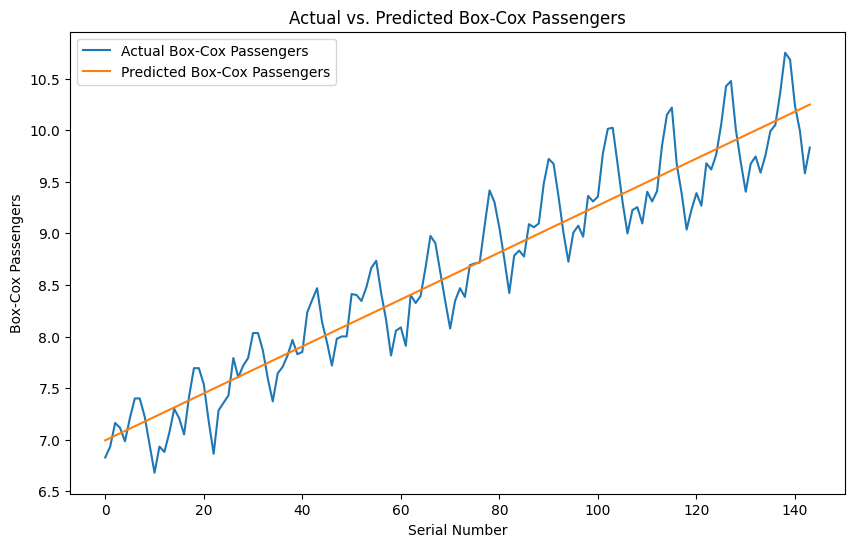

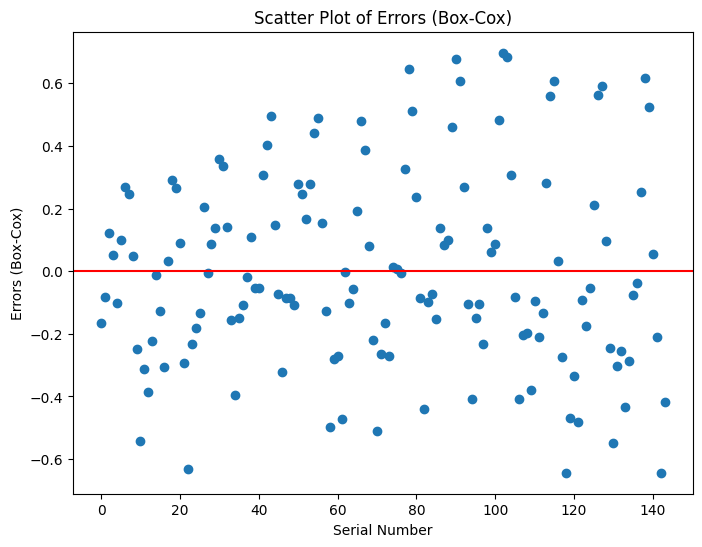

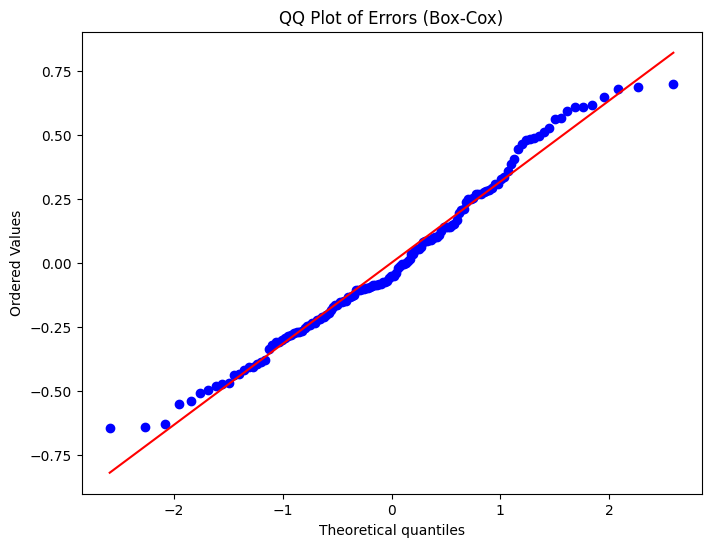

R-squared (Box-Cox): 0.9006803160450643
Mean Absolute Error (MAE) (Box-Cox): 0.25535183996044863
Root Mean Squared Error (RMSE) (Box-Cox): 0.31428182091968176

R-squared (Original Scale - Box-Cox): 0.858086552327395
Mean Absolute Error (MAE) (Original Scale - Box-Cox): 32.87301966974923
Root Mean Squared Error (RMSE) (Original Scale - Box-Cox): 45.03579919913172


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

# Assuming d1 is already loaded and processed as in the previous code

# Box-Cox transformation
d1['d1_boxcox'], lmbda = stats.boxcox(d1['Passengers'])

plt.figure(figsize=(10,6))
plt.plot(d1.index, d1['d1_boxcox'])
plt.xlabel("Serial Number")
plt.ylabel("Box-Cox Transformed Passengers")
plt.title("Box-Cox Transformed Passengers against Serial Number")
plt.show()

# Create OLS model with Box-Cox transformed data
X_boxcox = d1.index  # Serial number as independent variable
y_boxcox = d1['d1_boxcox']
X_boxcox = sm.add_constant(X_boxcox)  # Add a constant term to the independent variable
model_boxcox = sm.OLS(y_boxcox, X_boxcox).fit()

# Print model summary for Box-Cox transformed data
print(model_boxcox.summary())

# Make predictions for Box-Cox transformed data
predictions_boxcox = model_boxcox.predict(X_boxcox)

# Plot predicted values against actual values (Box-Cox transformed)
plt.figure(figsize=(10, 6))
plt.plot(d1.index, d1['d1_boxcox'], label='Actual Box-Cox Passengers')
plt.plot(d1.index, predictions_boxcox, label='Predicted Box-Cox Passengers')
plt.xlabel("Serial Number")
plt.ylabel("Box-Cox Passengers")
plt.title("Actual vs. Predicted Box-Cox Passengers")
plt.legend()
plt.show()

# Calculate errors for Box-Cox transformed data
errors_boxcox = y_boxcox - predictions_boxcox

# Scatter plot of errors (Box-Cox transformed)
plt.figure(figsize=(8, 6))
plt.scatter(d1.index, errors_boxcox)
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel("Serial Number")
plt.ylabel("Errors (Box-Cox)")
plt.title("Scatter Plot of Errors (Box-Cox)")
plt.show()

# QQ plot of errors (Box-Cox transformed)
plt.figure(figsize=(8, 6))
stats.probplot(errors_boxcox, dist="norm", plot=plt)
plt.title("QQ Plot of Errors (Box-Cox)")
plt.show()

# Calculate R-squared, MAE, and RMSE for Box-Cox transformed data
r_squared_boxcox = model_boxcox.rsquared
mae_boxcox = np.mean(np.abs(errors_boxcox))
rmse_boxcox = np.sqrt(np.mean(errors_boxcox**2))

print(f"R-squared (Box-Cox): {r_squared_boxcox}")
print(f"Mean Absolute Error (MAE) (Box-Cox): {mae_boxcox}")
print(f"Root Mean Squared Error (RMSE) (Box-Cox): {rmse_boxcox}")

# Inverse Box-Cox transformation of predictions
predictions_original_scale_bc = sp.special.inv_boxcox(predictions_boxcox, lmbda)

# Calculate errors on the original scale for Box-Cox
errors_original_scale_bc = y - predictions_original_scale_bc

# Calculate R-squared, MAE, and RMSE on the original scale for Box-Cox
r2_original_scale_bc = r2_score(y, predictions_original_scale_bc)
mae_original_scale_bc = mean_absolute_error(y, predictions_original_scale_bc)
rmse_original_scale_bc = np.sqrt(mean_squared_error(y, predictions_original_scale_bc))


print(f"\nR-squared (Original Scale - Box-Cox): {r2_original_scale_bc}")
print(f"Mean Absolute Error (MAE) (Original Scale - Box-Cox): {mae_original_scale_bc}")
print(f"Root Mean Squared Error (RMSE) (Original Scale - Box-Cox): {rmse_original_scale_bc}")


In [ ]:
# prompt: Create a dataset with class imbalance. Imbalance ratio is (1:1:0.2), 3 classes. Choose the points for each class from a gaussian distribution with different params.

import numpy as np
import pandas as pd

def create_imbalanced_dataset(n_samples, imbalance_ratio):
    # Define parameters for Gaussian distributions for each class
    means = [[0, 0],[4, 4] , [2, 2]]
    covs = [[[2, 0], [0, 2]], [[1, 0], [0, 1]], [[0.25, 0], [0, 0.25]]]

    # Calculate the number of samples for each class based on imbalance ratio
    n_samples_per_class = [
        int(n_samples * imbalance_ratio[0] / sum(imbalance_ratio)),
        int(n_samples * imbalance_ratio[1] / sum(imbalance_ratio)),
        int(n_samples * imbalance_ratio[2] / sum(imbalance_ratio)),
    ]

    # Generate samples for each class
    X = []
    y = []
    for i, n in enumerate(n_samples_per_class):
      X.extend(np.random.multivariate_normal(means[i], covs[i], n))
      y.extend([i] * n)

    # Create a pandas DataFrame from the generated samples
    df = pd.DataFrame(X, columns=['feature1', 'feature2'])
    df['class'] = y
    return df

# Example usage
imbalance_ratio = [1, 1, 0.02]  # Imbalance ratio 1:1:0.2
n_samples = 2000  # Total number of samples
df = create_imbalanced_dataset(n_samples, imbalance_ratio)

# Print the first few rows of the dataframe
print(df.head())

# Print class distribution
print("\nClass Distribution:")
print(df['class'].value_counts())


   feature1  feature2  class
0  1.472016  0.040334      0
1  0.012813 -0.846379      0
2 -0.086897 -0.903619      0
3  1.925751  1.014076      0
4 -0.247160 -0.267948      0

Class Distribution:
class
0    990
1    990
2     19
Name: count, dtype: int64


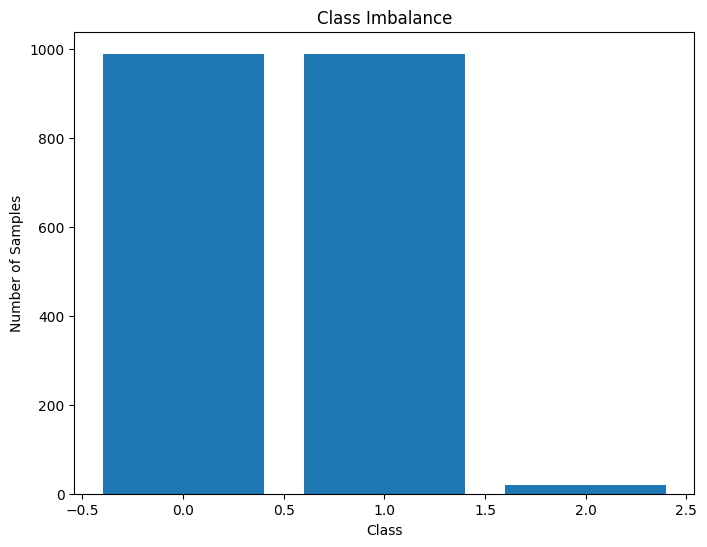

In [ ]:
# prompt: Create a bar plot, show the class imbalance.

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'class' column representing class labels
class_counts = df['class'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Imbalance")
plt.show()


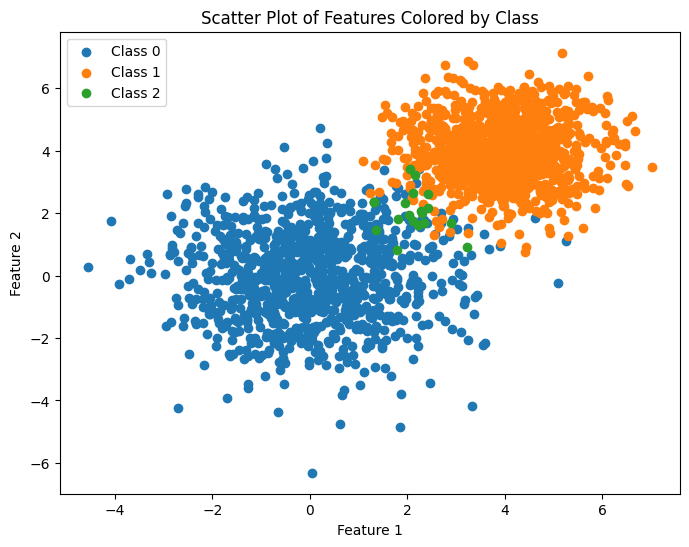

In [ ]:
# prompt: Create a scatter plot for the dataseet. Color the points based on classes.

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'feature1', 'feature2', and 'class' columns
plt.figure(figsize=(8, 6))
for class_label in df['class'].unique():
    class_data = df[df['class'] == class_label]
    plt.scatter(class_data['feature1'], class_data['feature2'], label=f'Class {class_label}')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Features Colored by Class")
plt.legend()
plt.show()


In [ ]:
# def tomek_links():


def smote(df, ur_class_id):
  ur_class = df[df['class'] == ur_class_id]
  # print(ur_class)
  for _ in range(1000):
    for id, elem in ur_class.iterrows():
      another_elem = ur_class.sample()
      # print(elem, '\n', another_elem)
      new_elem = pd.DataFrame(columns=['feature1', 'feature2', 'class'])
      new_elem['feature1'] = (another_elem['feature1'] + elem['feature1']) / 2
      new_elem['feature2'] = (another_elem['feature2'] + elem['feature2']) / 2
      new_elem['class'] = ur_class_id
      df = pd.concat([df, new_elem], ignore_index=True)

  return df

In [ ]:
df_new = smote(df, ur_class_id = 2)

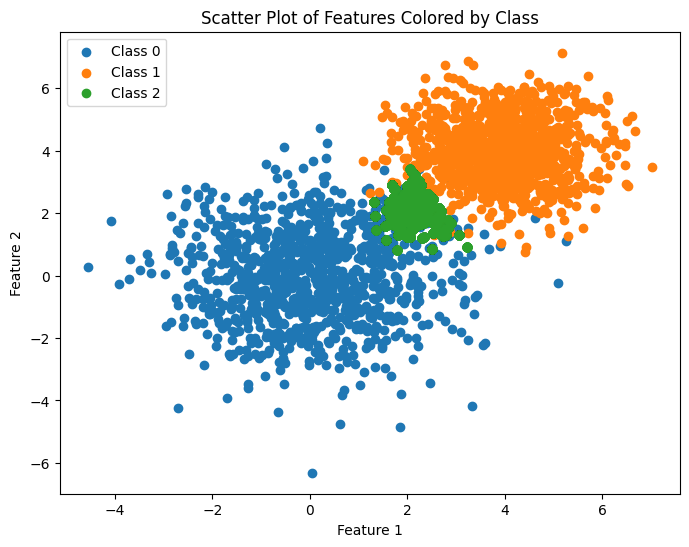

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'feature1', 'feature2', and 'class' columns
plt.figure(figsize=(8, 6))
for class_label in df_new['class'].unique():
    class_data = df_new[df_new['class'] == class_label]
    plt.scatter(class_data['feature1'], class_data['feature2'], label=f'Class {class_label}')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Features Colored by Class")
plt.legend()
plt.show()